# Decision Trees and Random Forest

In [1]:
# Import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
# import the df_tree csv
# This has the loans data with the term labels ordinally encoded

    
df_tree = pd.read_csv('data/df_tree.csv')
df_tree.sample(3)

,Income,Balance,Debt,Score,Default,term_labels
552,34200.0,1190.0,2759.0,302.0,1,1
37,23700.0,880.0,703.0,316.0,1,1
78,18200.0,1170.0,499.0,287.0,0,0



```
 "ID",         Customer ID
 "Income",     Annual Pre-Tax Income on-application
 "Term" ,      Short or Long Term (6mo or 12mo)
 "Balance",    Current Account Balance on-application
 "Debt" ,      Outstanding Debt on-application
 "Score",      Credit Score (from referencing agency)
 "Default"     Observed Default (True = Default, False = Settle
```

### Encoding

Decision trees work differently to Logistic Regression, so it is okay to Encode the Term Column as Ordinal Values.

The node will split to either 0 or 1 representing either short or long term.

## Imbalanced Data
 - Here we have an example of imbalanced data, which is always the case with Anomaly Detection
 - There are various ways to help deal with this issue, including
  - Under and over sampling
  - Using models better equipped for dealing with this type of data
 - We will look at using a Random Forest Classifier on this dataset to try and improve our model's accuracy 

In [3]:
# checking the classes
df_tree['Default'].value_counts()

0    750
1     86
Name: Default, dtype: int64

<AxesSubplot:>

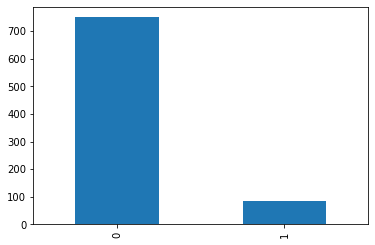

In [4]:
# PLot
df_tree['Default'].value_counts().plot(kind='bar')

##### Articles on dealing with Imbalanced Datsets and with Random Forests
https://towardsdatascience.com/how-to-deal-with-imbalanced-data-34ab7db9b100

https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/#:~:text=Bagging%20is%20an%20ensemble%20algorithm,used%20in%20each%20data%20sample.

# Data Prep

Not much to do here really, decision trees and random forests are resilient to outliers, the data does not need scaled and if we had missing values, a certain amount would be ok too.

As decision trees and random forests are rule based, we do not have a lot of the issues that we faced before with regression algorithms.

What did needed done was to encode the term labels. This has been done ordinally.

Decision trees in SKlearn cannot handle categorical variables and these must be encoded.

# Single Decision Tree

In [5]:
df_tree.columns

Index(['Income', 'Balance', 'Debt', 'Score', 'Default', 'term_labels'], dtype='object')

In [6]:
# Defining columns for the model
cols = ['Income',
        'Balance',
        'Debt',
        'Score',
        'term_labels']

In [7]:
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df_tree[cols], 
                                                    df_tree['Default'], 
                                                    test_size=0.3, 
                                                    random_state=1)


In [8]:
# Viewing Columns
X_test.columns

Index(['Income', 'Balance', 'Debt', 'Score', 'term_labels'], dtype='object')

In [11]:
# Importing Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier


# calling the decision tree method 
# setting max_depth to 2
# and min sample per leaf at 20
# this mean ther must be at least 20 samples in each leaf
dt = DecisionTreeClassifier(max_depth=2,
                            min_samples_leaf=20,
                            random_state = 42)


# fitting the decision tree onto the training data
dt.fit(X_train[cols], y_train)


predictions = dt.predict(X_test[cols])


# Printing the lcassification report
print(classification_report(y_test, 
                            predictions,
                            target_names=["Settles", "Defaults"]))



              precision    recall  f1-score   support

     Settles       0.90      0.99      0.94       219
    Defaults       0.80      0.25      0.38        32

    accuracy                           0.90       251
   macro avg       0.85      0.62      0.66       251
weighted avg       0.89      0.90      0.87       251



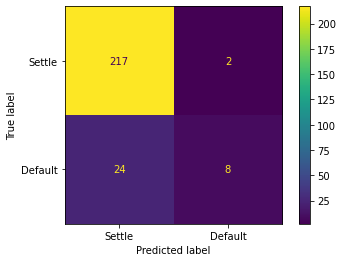

In [12]:
# PLotting the confusion matrix
cm = confusion_matrix(y_test, 
                      predictions, 
                      labels=dt.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('Settle','Default')
                             )

disp.plot();

How does this model compare the the basic logistic regression model?<br>
There are a few parameters that can be tweaked and you will attempt those soon.<br>
We changed the default parameters of the decision tree to allow us to create a very clear and simplified plot as can be seen below.

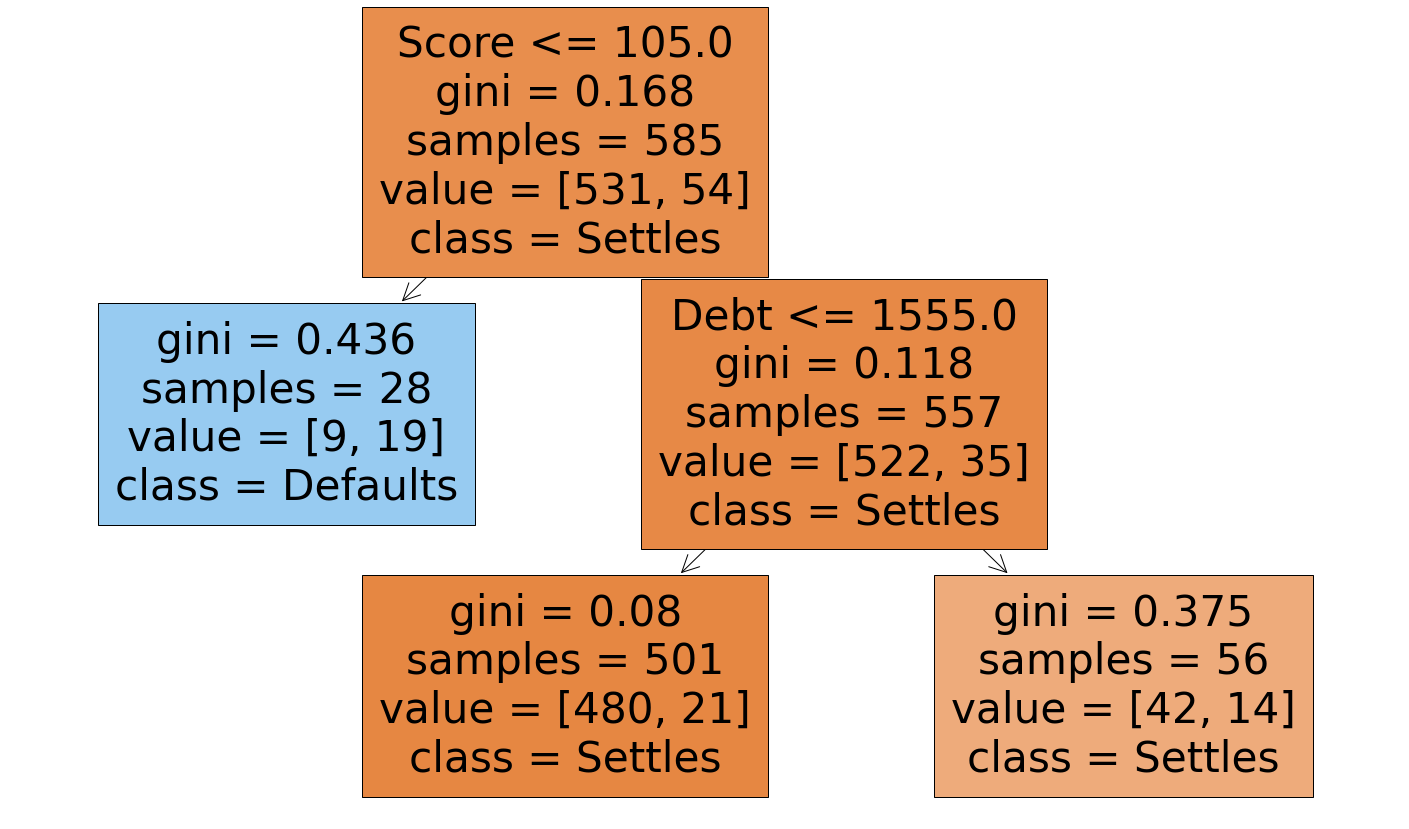

In [14]:
# plotting the decision tree
# This plot shows us how the tree was built
# the data at each node
# the Gini values

from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,15))

_ = tree.plot_tree(dt,
              feature_names = X_train[cols].columns,
               class_names = ['Settles','Defaults'],
               filled=True
              )



This is a very simple tree.

This overly simple model is comparable to the complicated Logistic Regression model that we ran on this data

#### Would this implicity introduce bias or variance?

In [15]:
# calling the decision tree method 
# setting max_depth to 2
# and min sample per leaf at 20
# this mean ther must be at least 20 samples in each leaf
dt = DecisionTreeClassifier(random_state = 42)


# fitting the decision tree onto the training data
dt.fit(X_train[cols], y_train)

DecisionTreeClassifier(random_state=42)

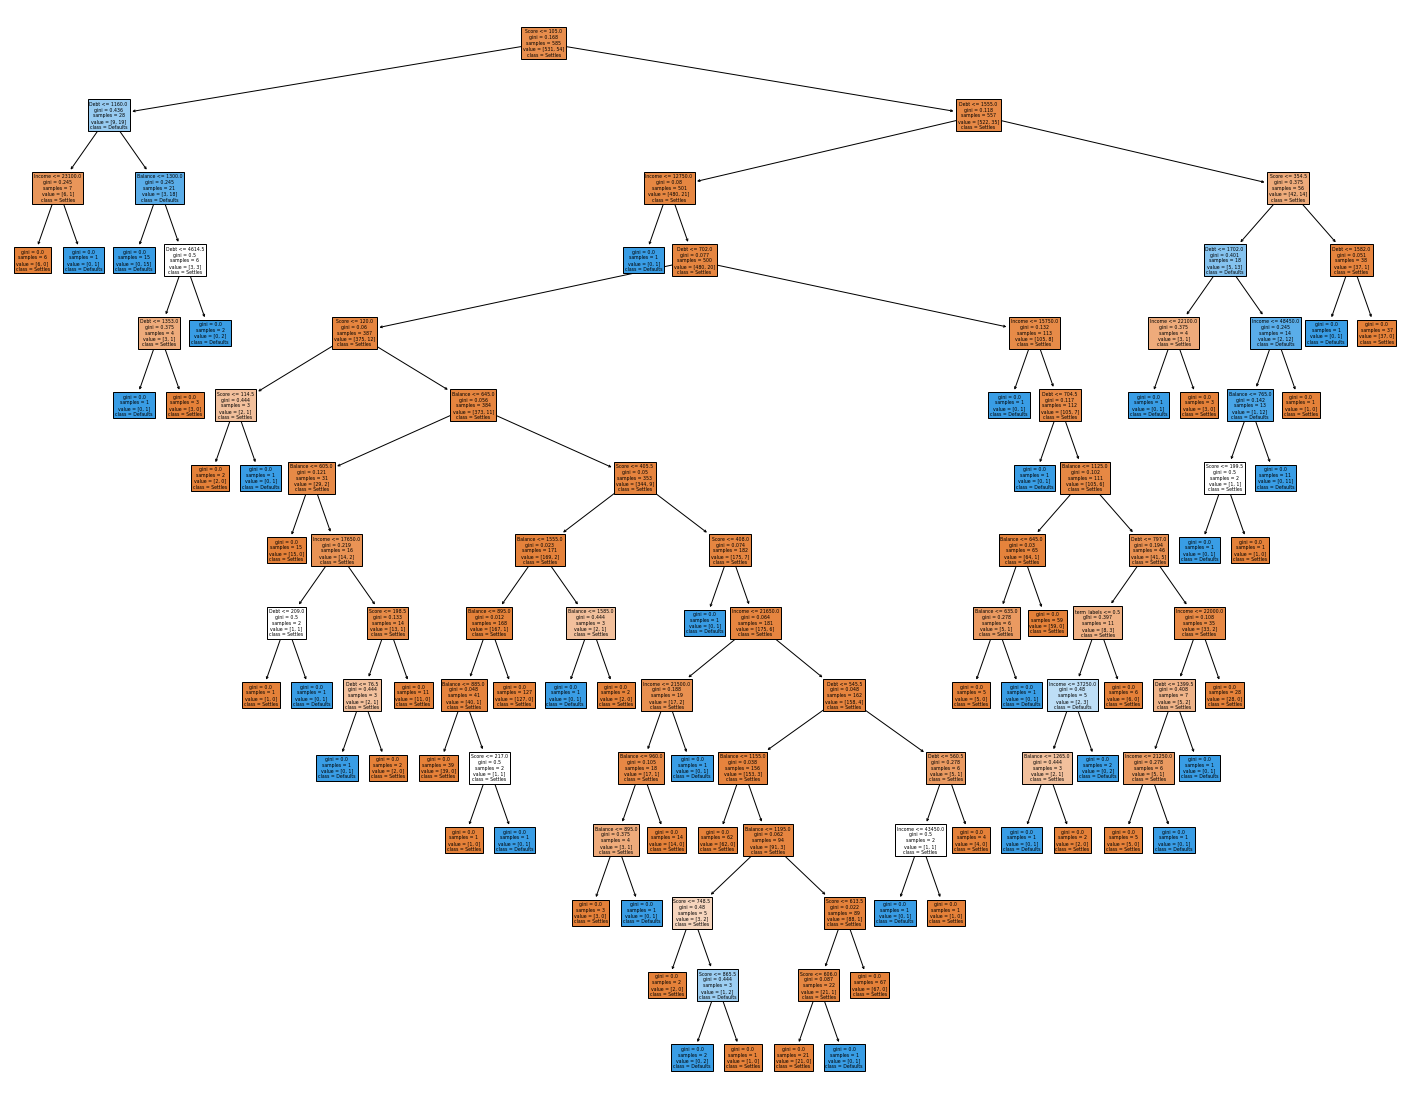

In [16]:
# plotting the decision tree
# This plot shows us how the tree was built
# the data at each node
# the Gini values

from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(dt,
              feature_names = X_train[cols].columns,
               class_names = ['Settles','Defaults'],
               filled=True
              )



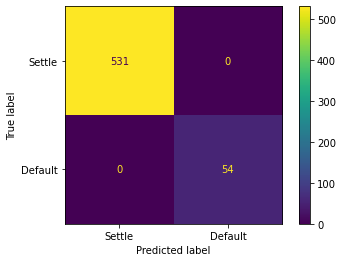

In [24]:
# PLotting the confusion matrix
cm = confusion_matrix(y_train, 
                      dt.predict(X_train[cols]), 
                      labels=dt.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('Settle','Default')
                             )

disp.plot();

In [25]:
print(classification_report(y_train, 
                            dt.predict(X_train[cols]),
                            target_names=["Settles", "Defaults"]))

              precision    recall  f1-score   support

     Settles       1.00      1.00      1.00       531
    Defaults       1.00      1.00      1.00        54

    accuracy                           1.00       585
   macro avg       1.00      1.00      1.00       585
weighted avg       1.00      1.00      1.00       585



In [27]:
print(classification_report(y_test,
                            dt.predict(X_test[cols]),
                            target_names=["Settles", "Defaults"]))

              precision    recall  f1-score   support

     Settles       0.94      0.96      0.95       219
    Defaults       0.68      0.59      0.63        32

    accuracy                           0.91       251
   macro avg       0.81      0.78      0.79       251
weighted avg       0.91      0.91      0.91       251



# Extracting feature importance

One of the benefits of decision trees and random forests is that we can extract the importance each feature played in creating the models. 

This information could then be used for feature selection for another model. Imagine you are building a regression model and have a lot of features, but want a more precise predictor than a Random Forest. The Random forest could be applied first, requiring little feature engineering, as a feature selector for the model after it.

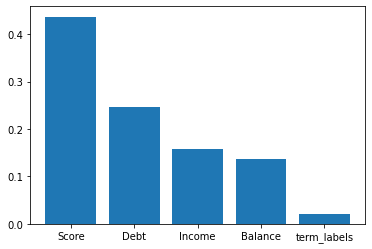

In [35]:
# extracting the feature importance of the model
# can be acessed by df.feature_importances_

# zipping together the feature anmes and thier scores
f_i = list(zip(dt.feature_names_in_,dt.feature_importances_))

# sorting by scores, highest first
f_i.sort(key = lambda x : x[1],reverse=True)

# plotting these scores
plt.bar([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

We can see score and debt were both used in the splits, Score was able to seperate all of the defaults that the model could find. There was benefit in using debt after that split on the right, as it did reduce the Gini, however due to the imbalance, the settles class still outweighed the defaults and no futher positive classifications for defaults could be made.

It is clear that if we increased the complexity of our model we would achieve better results.

### Task

A sindel decision tree can actually perform much beter on this imbalanced data set then the first one we created above

Max_depth and min_leaf sample are hyper parameters you can experiment with.<br>
Try running the model with different values and see if you get any improvement
- Max_depth - the number of splits that can be made in the decision process
- Min_samples_leaf, the minimum numbers of samples needed for a leaf node, i.e., when the algorithm terminates at a certain branch




- First run the model with default settings, and visualise this tree as we did above
 - you should observe a huge difference in structure, it may take a while to render also.
- Second see if you can find a less complex iteration with little loss in "overall" accuracy.

<details>
    <summary style="color:green;font-weight:bold">Solution</summary>
    
    Decision trees can easily overfit, we are not dealing with many features or samples, a tree with depth 3 and min sample around 5 should out perfomr the defualt settings

## Applying Random Forest 


Info on Random Forest classifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Have a look at the documentation and implement a random forest classifier on the dataset.<br>

There are lots of parameters, we will discuss a few after.  

- First implement with default settings then 
- Try altering some of the parameters below and observe theri impact:
 - number of estimators
 - max_depth
 - min_samples_leaf


Make sure to display the confusion matrix and investiage the precision and recall on each class

Accuracy of the model:0.8327    Number of trees = 1
Accuracy of the model:0.9203    Number of trees = 11
Accuracy of the model:0.9402    Number of trees = 21
Accuracy of the model:0.9323    Number of trees = 31
Accuracy of the model:0.9323    Number of trees = 41
Accuracy of the model:0.9363    Number of trees = 51
Accuracy of the model:0.9402    Number of trees = 61
Accuracy of the model:0.9363    Number of trees = 71
Accuracy of the model:0.9402    Number of trees = 81
Accuracy of the model:0.9363    Number of trees = 91
              precision    recall  f1-score   support

     Settles       0.90      0.99      0.94       219
    Defaults       0.80      0.25      0.38        32

    accuracy                           0.90       251
   macro avg       0.85      0.62      0.66       251
weighted avg       0.89      0.90      0.87       251



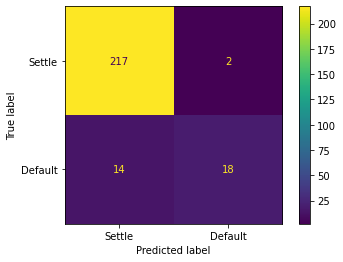

In [36]:
# Importing packages
from sklearn.ensemble import RandomForestClassifier



for trees in range(1,100,10):

    rf = RandomForestClassifier(
                                # setting the amount of trees in the forest
                                n_estimators = trees,

                                # the max depth of any tree
                                max_depth = 10,

                                # the minimum number of sample that must be in a leaf
                                min_samples_leaf=5,

                                # wether or not to use botstrapping, or all of the dataset on each tree
                                bootstrap=True,

                                # adding weights to each class, can be user defined
                                # or automatically calculated due to the distribution of classes
                                # balanced_subsample calculates wieghts for each sub sample of data each tree receives
                                class_weight = 'balanced_subsample',

                                random_state = 42
                                       ) 

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)


    print(f"Accuracy of the model:{metrics.accuracy_score(y_test, y_pred).round(4)}    Number of trees = {trees}")


# Displaying precision and recall figures
print(classification_report(y_test, 
                        predictions,
                        target_names=["Settles", "Defaults"]))


# PLotting the confusion matrix
predictions = rf.predict(X_test)

cm = confusion_matrix(y_test, 
                      predictions, 
                      labels=rf.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('Settle','Default')
                             )

disp.plot();

How does this compare with the model you built with logistic Regression?

How does it compare to the decision tree?

Aggregated/ensemble models are not universally better than their individual compenents.<br>
They severely out perform their single element counterparts when these elements suffer from instability<br>
With the amount of features and rows we have, even a single decision tree could become relatively stable.



## Extracting Feature Importance from the random forest

In [37]:
# Extracting feature names rom the model,
rf.feature_names_in_

array(['Income', 'Balance', 'Debt', 'Score', 'term_labels'], dtype=object)

In [38]:
# Extracting the importance in this case
rf.feature_importances_

array([0.15292996, 0.14931916, 0.32279726, 0.33557537, 0.03937825])

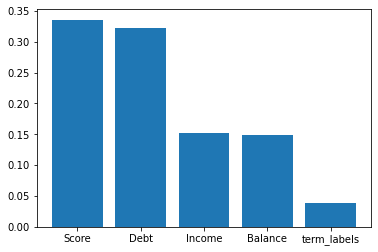

In [39]:
f_i = list(zip(rf.feature_names_in_,rf.feature_importances_))
f_i.sort(key = lambda x : x[1],reverse=True)
plt.bar([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
gb = GradientBoostingClassifier()

gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

Accuracy of the model:0.9203    Number of trees = 100
              precision    recall  f1-score   support

     Settles       0.92      0.99      0.96       219
    Defaults       0.88      0.44      0.58        32

    accuracy                           0.92       251
   macro avg       0.90      0.71      0.77       251
weighted avg       0.92      0.92      0.91       251



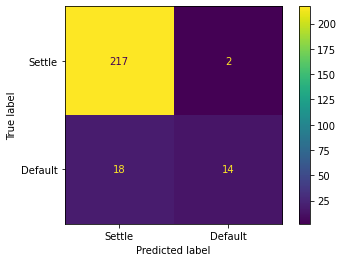

In [34]:
trees  = gb.n_estimators

print(f"Accuracy of the model:{metrics.accuracy_score(y_test, y_pred).round(4)}    Number of trees = {trees}")


# Displaying precision and recall figures
print(classification_report(y_test, 
                        y_pred,
                        target_names=["Settles", "Defaults"]))


# PLotting the confusion matrix

cm = confusion_matrix(y_test, 
                      y_pred, 
                      labels=gb.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('Settle','Default')
                             )

disp.plot();